# Exemplo de regressão linear com Scipy
OBS: Apenas unidimensional

In [45]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 

df = pd.read_csv("heavymachine_data.csv", sep=";")
output_colum = "Hours"
input_colums = ["Model","Aplication","Age"]
#retira coluna inutil
df.drop("Chassi", axis="columns", inplace=True)
#retira dados ruidosos
hours = df["Hours"]
std = hours.std()
mean = hours.mean()
df.drop(hours[hours > mean+std].index, inplace=True)
df.head()

,Hours,Model,Aplication,Age
0,461,111,71,11
1,277,90,39,10
2,905,87,35,10
3,437,87,72,10
4,311,90,35,10


In [47]:
x1 = []
x2 = []
x3 = []
y = []
for i,r in df.iterrows():    
    x1.append(r["Model"])
    x2.append(r["Age"])
    x3.append(r["Aplication"])
    y.append(r["Hours"])

R-squared: 0.172493


# O modelo

In [ ]:
a, b, r, p, std_err = stats.linregress(x2, y)
print("R-squared: %f" % r**2)

# Prevendo valores

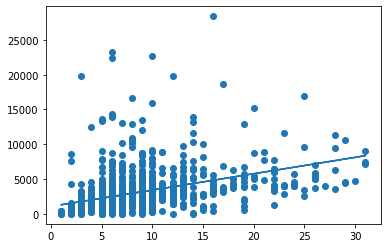

In [48]:
def estimate(x):
    return a*x+b

df["Estimated"] = df["Age"].apply(estimate)
plt.figure()
plt.plot(df["Age"], df["Estimated"])
plt.scatter(df["Age"], df["Hours"])
plt.show()
